In [1]:
import cv2
import random
from PIL import Image
import numpy as np
from IPython.display import display

In [2]:
def show(img):
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return Image.fromarray(img2)

In [40]:
def myFilter(img,mask,r=None):
    newImage = np.copy(img)
    
    ijStart = mask.shape[0] // 2
    
    img = cv2.copyMakeBorder(img, ijStart, ijStart, ijStart, ijStart, cv2.BORDER_REPLICATE)
    mask = mask.flatten()
      
    for i in range(0,newImage.shape[0]):
        for j in range(0,newImage.shape[1]):
            frame = img[i:i+ijStart*2+1,j:j+ijStart*2+1]
            frame = frame.flatten()
            
            mediana = []
            for p in range(len(mask)):
                for k in range(mask[p]):
                    mediana.append(frame[p])
             
            mediana.sort()

            if r==None:
                newImage[i,j] = mediana[len(mediana) // 2]
            else:
                newImage[i,j] = mediana[r]
    return newImage

In [4]:
def myNoisePer(img,per):
    newImage = np.copy(img)
    countOfPixels = int(img.shape[0]*img.shape[1]/100*per)
    for c in range(countOfPixels):
        i = random.randint(0,img.shape[0]-1)
        j = random.randint(0,img.shape[1]-1)
        newImage[i,j] = [random.choice([0,255]),random.choice([0,255]),random.choice([0,255])]
    return newImage

In [5]:
def getError(img1, img2):
    img1 = img1/255
    img2 = img2/255
    error = (np.sum((np.array(img1.flatten()) - np.array(img2.flatten())) ** 2) / (img1.shape[0] * img2.shape[1] * 3)) ** 0.5
    return error

In [41]:
def doLab(img):
    kernel = np.array([
        [2, 1, 2],
        [1, 1, 1],
        [2, 1, 2]])
    
    imgNoisy = myNoisePer(img, 14)
    
    b, g, r = cv2.split(img)
    bNoise, gNoise, rNoise = cv2.split(imgNoisy)
    
    rOut = myFilter(rNoise, kernel,8)
    gOut = myFilter(gNoise, kernel,8)
    bOut = myFilter(bNoise, kernel,8)
    
    newImg = cv2.merge((bOut, gOut, rOut))
    
    display(show(img),show(imgNoisy),show(newImg))
    
    print("Error (noise image): ", getError(img, imgNoisy))
    print("Error (after filter): ", getError(img, newImg))

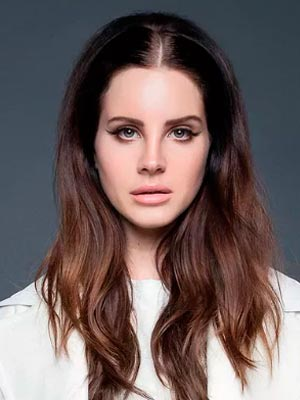

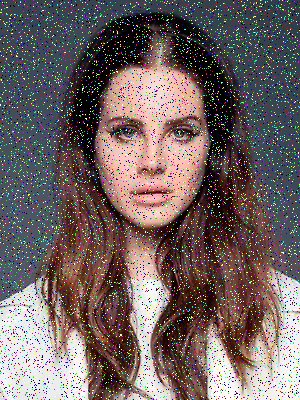

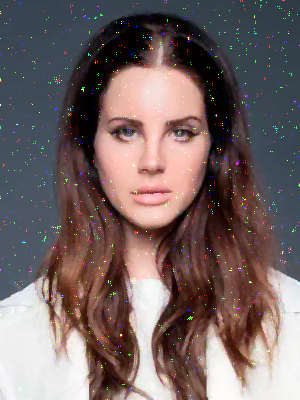

Error (noise image):  0.21198753315344365
Error (after filter):  0.07671903526556569


In [42]:
img1 = cv2.imread("lana.jpg")
doLab(img1)